# Quantum Reservoir Computing

# 待辦事項列表 (To-Do List)

## **一、改進模擬**
1. [ ] 加入短期記憶容量 (STM) 的計算
2. [ ] 加入奇偶校驗容量 (PC) 的計算
3. [ ] 實現正規化均方誤差 (NMSE) 的計算
4. [ ] 加入虛擬節點的建構（時間多工）
5. [ ] 實現線性讀出層的訓練
6. [ ] 實現自迴圈模式（Closed-Loop Mode）

## **二、性能評估**
1. [ ] 計算短期記憶容量 (STM)
2. [ ] 計算奇偶校驗容量 (PC)
3. [ ] 計算純度 (Purity)
4. [ ] 計算糾纏熵 (Entanglement Entropy)
5. [ ] 分析資訊傳播通道
6. [ ] 多樣性分析

## **三、理論與應用**
1. [ ] 資訊處理容量理論的分析
2. [ ] 測試具體任務（如 NARMA、Mackey-Glass、分類任務）

**Generic Quantum System** $H = \sum_{i < j} J_{ij} \sigma_x^{(i)} \sigma_x^{(j)} + h \sum_{i} \sigma_z^{(i)} $

- $ J_{ij} $：隨機耦合強度，從 $[-J_s/2, J_s/2]$ 中均勻抽樣。
- h ：橫場強度。
- $ \sigma_x^{(i)}$ and $ \sigma_z^{(i)} $：第 (i) 個自旋的 Pauli 矩陣。


1. 通過哈密頓量 (H)，計算了時間演化算符： $ U(t) = e^{-i H t} $ 並使用 $U(t)$ 對量子態進行時間演化： $ \rho(t + \Delta t) = U(\Delta t) \rho(t) U^\dagger(\Delta t) $

2. 在每個時間間隔 $\Delta t$ 時，將隨機輸入 $s \in [0, 1]$ 編碼為量子態： $ \psi_{\text{inject}} = \sqrt{1-s} |0\rangle + \sqrt{s} |1\rangle $ 並將其與系統的其餘部分進行張量積，更新整個系統的量子態： $ \rho_{\text{new}} = \psi_{\text{inject}} \otimes \rho_{\text{reduced}} $

3. 計算每個自旋的可觀測量（例如 $\sigma_z$ 的期望值）： $ \langle \sigma_z^{(i)} \rangle = \text{Tr}(\rho \cdot \sigma_z^{(i)})$

4. 使用 Hilbert-Schmidt 距離來量化兩個量子態之間的差異： $ D(\rho_1, \rho_2) = \sqrt{\text{Tr}[(\rho_1 - \rho_2)^2]} $


## Short-Term Memory, STM

是量化系統對過去輸入的記憶能力的指標。STM 的計算基於輸入序列和系統輸出的相關性。

公式： $$ MC = \sum_{\tau} \text{Corr}^2(y(t), x(t-\tau)) $$ 其中：

$ x(t) $：輸入序列

$ y(t) $：系統輸出

$ \tau $：延遲時間

$ \text{Corr} $：相關性

步驟 1：設計 STM 計算框架
我們需要以下幾個部分：

1. 生成隨機輸入序列 ( x(t) )
2. 模擬系統響應 ( y(t) )
3. 計算輸入與輸出之間的相關性

Parity Check Capacity (delay=1): -0.29277002188455986


1. 糾纏熵的計算
分析系統中量子態的糾纏特性，計算部分跡後的 von Neumann 熵： $ S(\rho) = -\text{Tr}(\rho \log_2 \rho) $ 其中 $\rho$ 是對部分自旋取跡後的密度矩陣。

2. 量子通道的模擬
模擬量子通道（例如退極化通道）對量子態的影響： $ \mathcal{E}(\rho) = (1-p) \rho + p \frac{\mathbb{I}}{d} $ 其中 (p) 是噪聲強度，(d) 是系統的希爾伯特空間維度。

3. 量子測量的模擬
模擬對量子態進行投影測量的過程： $ P_k = |\psi_k\rangle \langle \psi_k|, \quad \rho_{\text{post}} = \frac{P_k \rho P_k}{\text{Tr}(P_k \rho)} $ 其中 $P_k$ 是測量算符，$\rho_{\text{post}}$ 是測量後的量子態。

4. 記憶能力的分析
計算系統的記憶容量，用於量化系統對過去輸入的記憶程度： $ MC = \sum_{\tau} \text{Corr}^2(y(t), x(t-\tau)) $ 其中 $\text{Corr}$ 是輸入 $x(t-\tau)$ 和輸出 $y(t)$ 的相關性，$\tau$ 是延遲。

5. 多樣性分析
分析系統狀態的多樣性，計算狀態分佈的熵： $ H = -\sum_{i} p_i \log_2 p_i $ 其中 $p_i$ 是系統狀態的概率分佈。

6. 輸入與輸出映射
設計輸入序列 (x(t)) 和輸出序列 (y(t))，並學習它們之間的映射： $ y(t) = f(x(t), x(t-1), \dots, x(t-\tau)) $ 其中 (f) 是由量子態的演化和測量結果決定的函數。


In [3]:
# 目標：分析自旋網絡中量子態的糾纏特性，這是量子資訊處理的重要基礎。
# 實現：計算量子態的糾纏熵（例如 von Neumann entropy）。
# 分析不同時間步驟下的糾纏動態。
def von_neumann_entropy(rho):
    """Calculate the von Neumann entropy of a density matrix."""
    eigenvalues = rho.eigenenergies()
    entropy = -np.sum([val * np.log2(val) for val in eigenvalues if val > 0])
    return entropy

# 目標：模擬量子通道（如去相干通道、退極化通道）對量子態的影響。
# 這是 QIP 中的關鍵部分。實現：在時間演化過程中，加入隨機噪聲模擬量子通道的影響。
def depolarizing_channel(rho, p):
    """Apply a depolarizing channel to a density matrix."""
    d = rho.shape[0]
    return (1 - p) * rho + p * qeye(d) / d

# 在模擬中加入退極化通道
p = 0.1  # 噪聲強度
rho_current = depolarizing_channel(rho_current, p)

# 增加量子測量的模擬
# 目標：模擬量子測量過程，並分析測量結果對系統的影響。
# 實現：在每個時間步驟中，對某些自旋進行測量，並更新量子態。
def projective_measurement(rho, operator):
    """Perform a projective measurement on a density matrix."""
    eigenvalues, eigenstates = operator.eigenstates()
    probabilities = [np.real((rho * state.proj()).tr()) for state in eigenstates]
    outcome = np.random.choice(len(eigenvalues), p=probabilities)
    post_measurement_state = eigenstates[outcome].proj()
    return post_measurement_state, eigenvalues[outcome]

# 對第一個自旋進行測量
measurement_operator = observables(0, Num_spins)
rho_current, measurement_result = projective_measurement(rho_current, measurement_operator)

# 記憶能力與多樣性分析
# 目標：分析系統的記憶能力和狀態多樣性，這是 QRC 的重要性能指標。
# 實現：計算記憶容量（Memory Capacity, MC）。分析不同輸入序列對系統狀態的影響。
def memory_capacity(x_values, y_values, delay):
    """Calculate memory capacity for a given delay."""
    X_delayed = np.roll(x_values, delay, axis=0)
    correlation = np.corrcoef(X_delayed.flatten(), y_values.flatten())[0, 1]
    return correlation**2

# 計算不同延遲下的記憶容量
delays = range(1, 10)
mc_values = [memory_capacity(X_train, y_train, delay) for delay in delays]

NameError: name 'rho_current' is not defined

In [4]:
# DEFINE PARAMETERS
Num_spins = 5                                                          # number of spins
tlist = np.linspace(0, 500, 20000)                                     # time parameters
dt = tlist[1] - tlist[0]                                               # time incremental
delta_t = [0.1, 0.5, 1, 2, 4, 8, 12, 16]                               # time interval between two inputs
Num_trials = len(delta_t)


# DEFINE THE MODEL
h = 1                                                                  # transverse field strength
Js = 1
sx = sigmax()
sz = sigmaz()
si = qeye(2)
H = 0                                                                  # Initialize the Hamiltonian

for i in range(Num_spins):                                             # Build the interaction part
    for j in range(i+1, Num_spins):
        # Start with identities
        op_list = [si] * Num_spins
        # Place Pauli-x on the i-th spin 
        op_list[i] = sx
        # Place Pauli-x on the j-th spin
        op_list[j] = sx
        # Add interaction term with random coupling J
        J = np.random.uniform(-Js/2, Js/2)
        H += J * tensor(op_list)
        
        
for i in range(Num_spins):                                             # Build the transverse field part
    # Start with identities
    op_list = [si] * Num_spins
    # Place Pauli-z on the i-th spin
    op_list[i] = sz
    # Add transverse field term with transverse field strength h
    H += h * tensor(op_list)
    
U = qutip.propagator(H, dt)                                            # Build the propagator

# DEFINE THE OBSERVABLES
def observables(i, num_spins):
    # Create the list of operators for the tensor product
    # Start with identities
    operators = [si] * num_spins             
    # Replace the i-th operator with Pauli-z
    operators[i] = sz  

    # Take the tensor product of the list of operators
    M_i = tensor(operators)
    
    return M_i

# DEFINE DISTANCE FUNCTIONS
def Hilbert_Schmidt_Distance(rho_1, rho_2):

    diff = rho_1 - rho_2
    distance = np.sqrt((diff.dag() * diff).tr())
    
    return distance

In [5]:
# START THE SIMULATION

distance_values = {i: [] for i in range(Num_trials)}                             # Define distance values storage for each delta t
expectation_values = {i: [] for i in range(Num_trials)}                          # Define observable expectation values storage
x_values = {i: [] for i in range(Num_trials)}                                    # Define RC variables storage

trial_count = 0
for t in delta_t:
    step_count = 0                                                               # Time-step counting
    expectation_values[trial_count] = {i: [] for i in range(Num_spins)}          # Define observable expectation values storage for current delta_t
    x_values[trial_count] = {i: [] for i in range(Num_spins)}                    # Define RC variables storage for current delta_t 

    psi_current = tensor([basis(2, 0) for _ in range(Num_spins)])                # Define the initial state 1 and state 2 (for testing fading memory)
    psi_test = tensor([basis(2, 1) for _ in range(Num_spins)])
    rho_current = psi_current * psi_current.dag()
    rho_test = psi_test * psi_test.dag()
    for _ in tlist:
        if step_count % int(t / dt) == 0:                                          # Do the injection at t = delta_t = 10*dt
            s = np.random.uniform(0, 1)                                          # Encode the inputs   
            psi_inject = np.sqrt(1-s) * basis(2, 0) + np.sqrt(s) * basis(2, 1)   # Prepare the injection qubits
            rho_inject = psi_inject * psi_inject.dag()
            
            rho_reduced = rho_current.ptrace([1,2,3,4])                          # Partial trace current state over its spins that used for injection
            rho_current = tensor(rho_inject, rho_reduced)                        # Update the state by tensoring the injection qubits and the rest of its qubits
            rho_test_reduced = rho_test.ptrace([1,2,3,4])
            rho_test = tensor(rho_inject, rho_test_reduced)
            
            #Propagate the states 
            rho_current = U * rho_current * U.dag()
            rho_test = U * rho_test * U.dag()
            
            x_values[trial_count][0].append((observables(0, 5) * rho_current).tr())  # Calculate RC variables at current time-step
            x_values[trial_count][1].append((observables(1, 5) * rho_current).tr())
            x_values[trial_count][2].append((observables(2, 5) * rho_current).tr())
            x_values[trial_count][3].append((observables(3, 5) * rho_current).tr())
            x_values[trial_count][4].append((observables(4, 5) * rho_current).tr())
            
        else:
            #Propagate the states 
            rho_current = U * rho_current * U.dag()
            rho_test = U * rho_test * U.dag()
    
    
    
        expectation_values[trial_count][0].append((observables(0, 5) * rho_current).tr())     # Calculate the observables at current time
        expectation_values[trial_count][1].append((observables(1, 5) * rho_current).tr())
        expectation_values[trial_count][2].append((observables(2, 5) * rho_current).tr())
        expectation_values[trial_count][3].append((observables(3, 5) * rho_current).tr())
        expectation_values[trial_count][4].append((observables(4, 5) * rho_current).tr())
        distance_values[trial_count].append(Hilbert_Schmidt_Distance(rho_current, rho_test))  # Calculate the distance between two quantum states at current time
        
    
        
        
        step_count += 1                                                          # Record time-step
        
    trial_count +=1



/usr/local/Caskroom/miniconda/base/envs/qiskit-env/lib/python3.10/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/Caskroom/miniconda/base/envs/qiskit-env/lib/python3.10/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


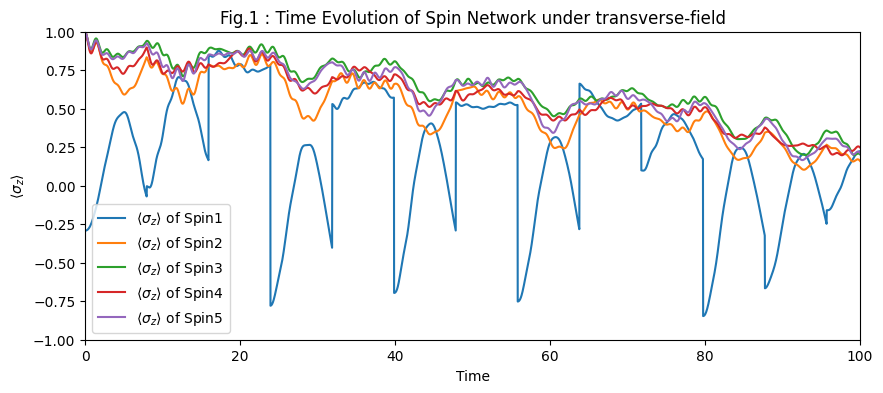

In [6]:
# Plot the result for time-evolved observables
plt.figure(figsize = (10,4))
for j in range(Num_spins):
    plt.plot(tlist, expectation_values[5][j], label = fr'$\langle \sigma_z \rangle$ of Spin{j+1}')

plt.xlim([0, 100])
plt.ylim([-1, 1])
plt.xlabel('Time')
plt.ylabel(r'$\langle \sigma_z \rangle$')
plt.title('Fig.1 : Time Evolution of Spin Network under transverse-field')
plt.legend()
plt.show()

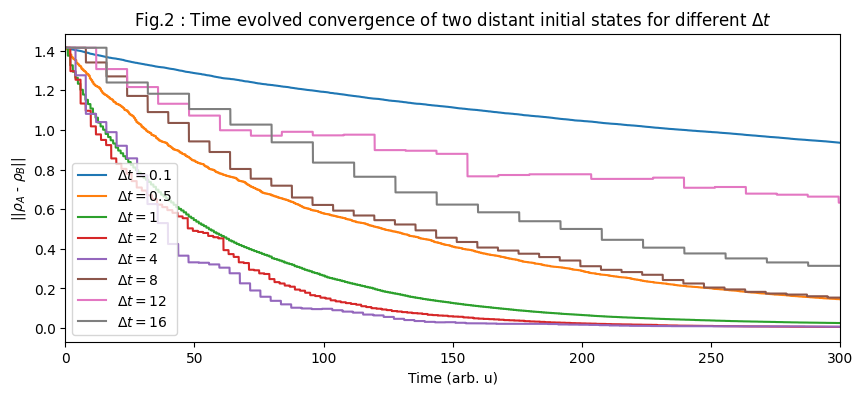

In [7]:
# Plot the result for time-evolved distance between two quantum states
plt.figure(figsize = (10,4))

for j in range(Num_trials):
    plt.plot(tlist, distance_values[j], label = f'$\Delta t = {delta_t[j]}$')

plt.xlim([0, 300])
plt.xlabel('Time (arb. u)')
plt.ylabel(r'||$\rho_A$ - $\rho_B$||')
plt.title('Fig.2 : Time evolved convergence of two distant initial states for different $\Delta t$')
plt.legend()
plt.show()

# Temporal Multiplexing & Spatial Multiplexing

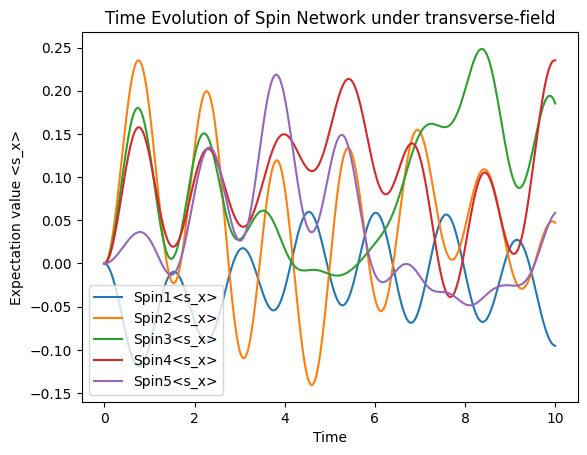

In [101]:
# Define initial state
psi_current = tensor([basis(2, 0) for _ in range(Num_spins)])
rho_current = psi_current * psi_current.dag()


# Evolve the system
result = mesolve(H, psi_current, tlist, [], [tensor([sx if i==j else si for i in range(Num_spins)]) for j in range(Num_spins)])

# Plot the result
for j in range(Num_spins):
    plt.plot(tlist, result.expect[j], label = f'Spin{j+1}<s_x>')

plt.xlabel('Time')
plt.ylabel('Expectation value <s_x>')
plt.title('Time Evolution of Spin Network under transverse-field')
plt.legend()
plt.show()